*HECHO POR:* <br>*PRECIADO TORRES JOSE RAMON* <br>*ORTIZ VEGA DANTAR ALEJANDRO*

# EMPRESA TRANSPORTADORA DE CARGA

**Descripcion**

Una empresa de transporte de carga que opera en una region que abarca varias ciudades y areas rurales, recoge cargas de multiples proveedores ubicados en diferentes áreas y la entrega a una variedad de destinos finales, los cuales pueden incluir almacenes, centros comerciales, empresas industriales, puertos, etc.

El desafio es optimizar las rutas de los camiones para recolectar la carga de manera eficiente desdse los proveedores y entregarla a los destinos finales, minimizando la distancia recorrida, los tiempos de transito y los costos operativos asociados.

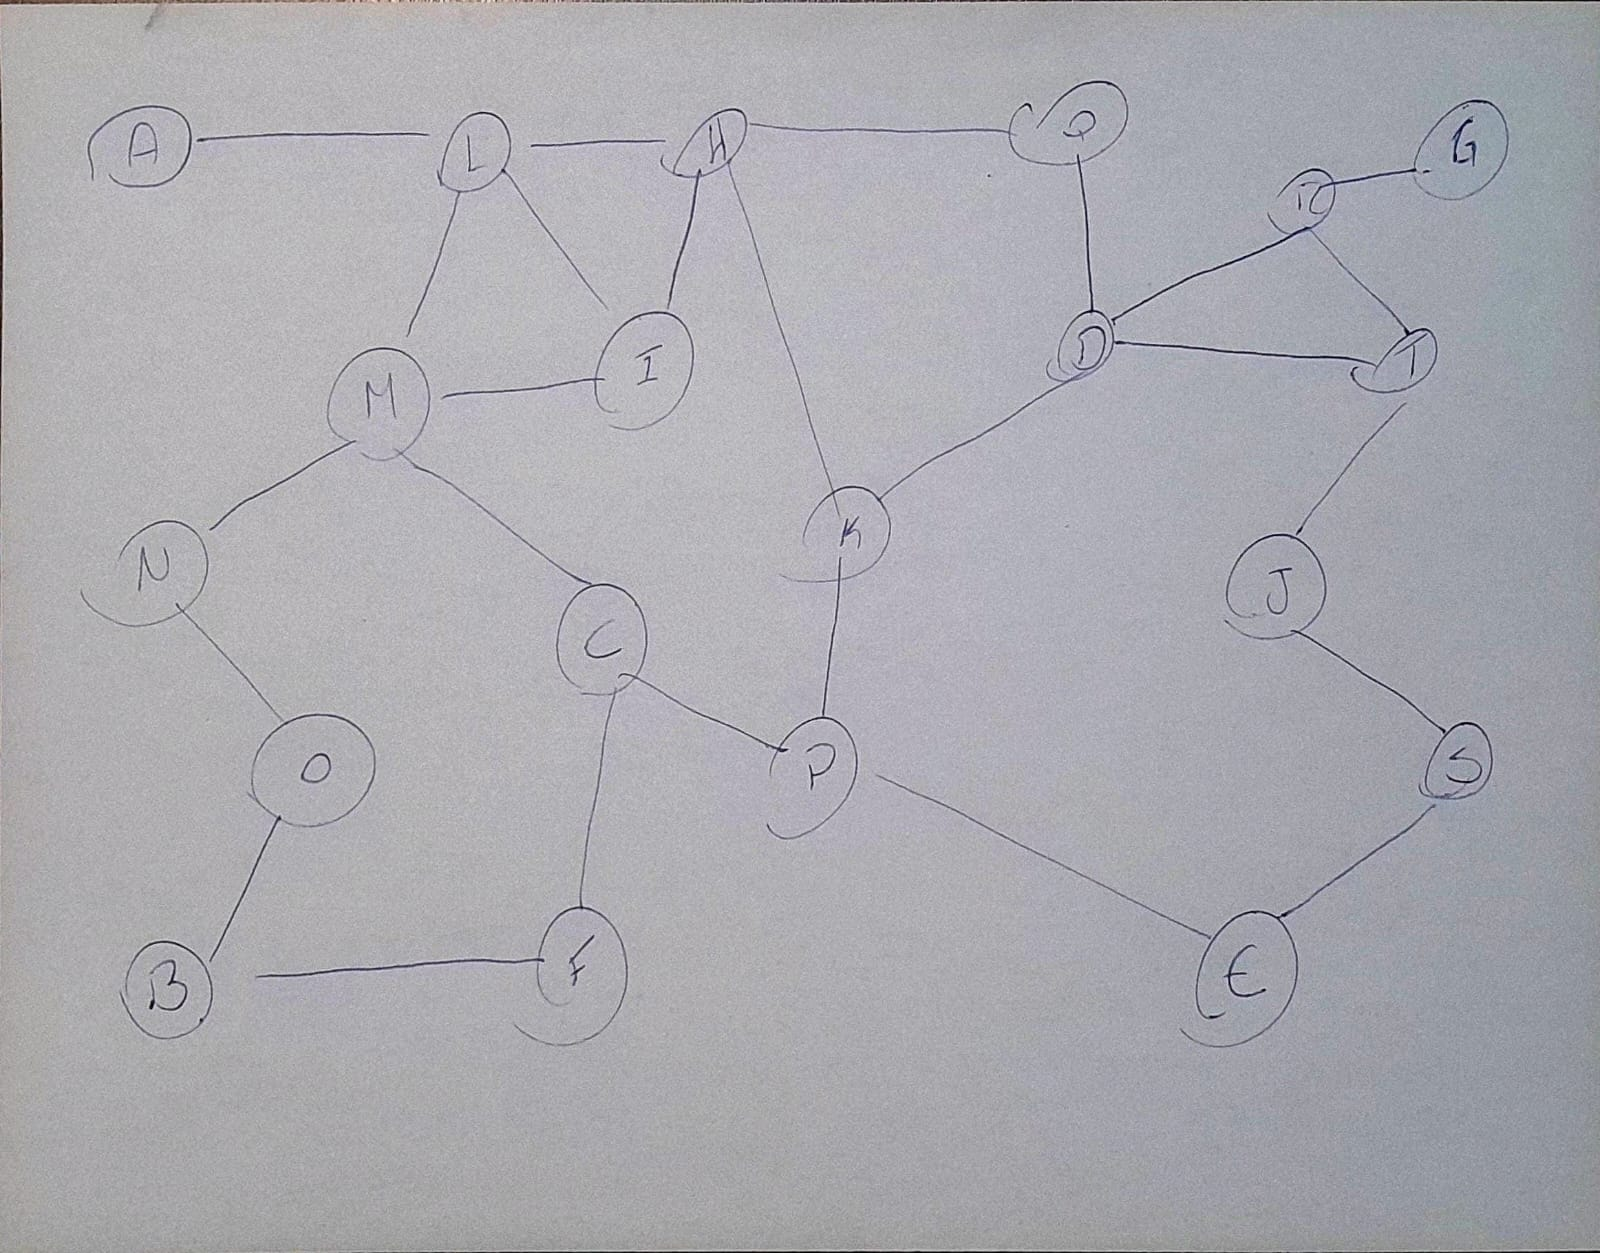

**Definicion de estados**

Representaran las ubicaciones donde se encuentran los proveedores de carga, los destinos finales y psibles ubicaciones intermedias importantes como centros de transferencia, áreas de descanso, etc.

A: Deposito Central.<br>
B: Almacén Principal. <br>
C: Terminal de Carga. <br>
D: Puerto de Entrega. <br>
E: Puerto de Recoleccion A. <br>
F: Centro de Distribución. <br>
G: Deposito Regional. <br>
H: Área de Carga y Descarga. <br>
I: Plaza de Abastecimiento. <br>
J: Terminal de Envios. <br>
K: Zona Industrial. <br>
L: Distrito Comercial. <br>
M: Puerto Maritimo. <br>
N: Zona de Almacenamiento. <br>
O: Destino Comercial. <br>
P: Terminal Logística. <br>
Q: Área de Transferencia. <br>
R: Terminal de Descanso. <br>
S: Punto de Carga Rápida. <br>
T: Área de Descarga. <br>

In [ ]:
import numpy as np

# Definición de los estados
def_de_estados = {'A': 0,
                  'B': 1,
                  'C': 2,
                  'D': 3,
                  'E': 4,
                  'F': 5,
                  'G': 6,
                  'H': 7,
                  'I': 8,
                  'J': 9,
                  'K': 10,
                  'L': 11,
                  'M': 12,
                  'N': 13,
                  'O': 14,
                  'P': 15,
                  'Q': 16,
                  'R': 17,
                  'S': 18,
                  'T': 19}
print(def_de_estados)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19}


**Definicion de acciones**

Las acciones representaran los movimientos posibles que pueden realizar los camiones entre las diferentes ubicaciones, Estas acciones podrian incluir recolectar carga de un proveedor, dejar la carga en un destino final, moverse entre ubicaciones intermedias, etc.

0: Recoger en Depósito Central. <br>
1: Recoger en Almacén Principal. <br>
2: Recoger en Terminal de Carga. <br>
3: Recoger en Puerto de Entrega. <br>
4: Recoger en Punto de Recoleccion A. <br>
5: Entrega en Centro de Distribución. <br>
6: Entrega en Depósito Regional. <br>
7: Entrega en Área de Carga y Descarga. <br>
8: Entrega en Plaza de Abastecimiento. <br>
9: Entrega en Terminal de Envios. <br>
10: Moverse a Zona Industrial. <br>
11: Moverse a Distrito Comercial. <br>
12: Moverse a Puerto Maritimo. <br>
13: Moverse a Zona de Almacenamiento. <br>
14: Moverse a Destino Comercial. <br>
15: Moverse a Terminal Logística. <br>
16: Moverse a Área de Transferencia. <br>
17: Moverse a Terminal de Descanso. <br>
18: Moverse a Punto de Carga Rápida. <br>
19: Moverse a Área de Descarga. <br>

In [ ]:
acciones = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
print(acciones)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


**Definicion de recompensas**

Esta matriz indicará las recompensas asociadas con cada transicion entre estados debido a una accion particular.
- Si el camion recolecta carga de manera eficiente de un proveedor, recompensa = 1
- Si el camion entrega la carga en un destino final, recompensa = 10
- Si el camion se mueve entre ubicaciones sin recolectar ni entregar carga, recompensa = 0
- Si el camion intenta moverse a una ubicacion no valida o realizar una acción no permitida, recompensa = -1

In [ ]:
# Matriz de recompensa (R)
matriz = np.array([
                   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                   [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
                   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
                   ])

# Mostrar la matriz de recompensa
print("Matriz de recompensa (R): \n", matriz)

Matriz de recompensa (R): 
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
